In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel("https://lmip.gov.au/PortalFile.axd?FieldID=3195450&.xlsx", sheet_name="SA4 based regions")
df = df.query("Industry=='Information Media and Telecommunications'")

In [5]:
# data exploration
df.describe()

,Employment by Industry - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth by Industry,Employment Distribution (%)
count,46.000000,46.000000,46.00000,46.000000,46.000000,46.000000,46.000000
mean,8245.652174,6345.652174,1721.73913,4413.043478,3695.652174,-915.217391,1.045652
std,28476.756264,21419.520759,5893.91072,14694.497968,12921.953009,3736.544297,0.709838
min,0.000000,0.000000,0.00000,0.000000,0.000000,-23800.000000,0.000000
25%,600.000000,425.000000,125.00000,200.000000,300.000000,-1275.000000,0.500000
50%,1500.000000,1250.000000,350.00000,950.000000,600.000000,-400.000000,0.900000
75%,4900.000000,3900.000000,1200.00000,2875.000000,2275.000000,475.000000,1.475000
max,192500.000000,144300.000000,40000.00000,99400.000000,87000.000000,2600.000000,2.900000


In [7]:
# data exploration
df.isnull().sum()

Employment Region                 0
State/Territory                   0
Industry                          0
Employment by Industry - Total    0
Employed Full-Time                0
Employed Part-Time                0
Employed - Male                   0
Employed - Female                 0
Five year growth by Industry      0
Employment Distribution (%)       0
dtype: int64

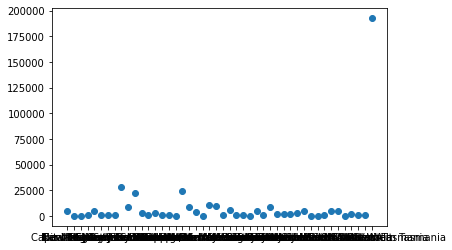

In [9]:
import matplotlib.pyplot as plt
# seeing if the data is skewed(high Std)
plt.scatter(df['Employment Region'],df['Employment by Industry - Total'])
# i notice an outlier 

In [11]:
df[df['Employment by Industry - Total'] == df['Employment by Industry - Total'].max()]

,Employment Region,State/Territory,Industry,Employment by Industry - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth by Industry,Employment Distribution (%)
864,Australia,AUST,Information Media and Telecommunications,192500,144300,40000,99400,87000,-23800,1.5


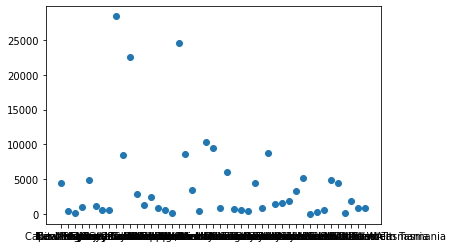

In [12]:
test_df = df.drop(labels=864, axis=0)
plt.scatter(test_df['Employment Region'],test_df['Employment by Industry - Total'])

In [21]:
#some regions in NSW have extremely high employment total.
test_df[test_df['Employment by Industry - Total'] > 20000]#test_df['Employment by Industry - Total'].max()]

,Employment Region,State/Territory,Industry,Employment by Industry - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth by Industry,Employment Distribution (%)
161,Sydney East Metro,NSW,Information Media and Telecommunications,28400,23300,5100,14700,13800,-3100,2.8
199,Sydney North and West,NSW,Information Media and Telecommunications,22600,19400,3200,12300,10300,1300,2.9
332,Inner Metropolitan Melbourne,VIC,Information Media and Telecommunications,24500,19200,5300,11300,13100,400,2.7


In [25]:
# A region in SA introduce us to the other end of the spectrum.
test_df[test_df['Employment by Industry - Total'] < 100]

,Employment Region,State/Territory,Industry,Employment by Industry - Total,Employed Full-Time,Employed Part-Time,Employed - Male,Employed - Female,Five year growth by Industry,Employment Distribution (%)
693,Mid North SA,SA,Information Media and Telecommunications,0,0,0,0,0,-1000,0.0


In [28]:
# lets visualise in which state a individual can find a better opportunity! (better means a full time opportunity in this context).
temp_df = test_df[['State/Territory', 'Employed Full-Time', 'Employed Part-Time']].groupby("State/Territory").sum()
temp_df.sort_values(by = "Employed Full-Time", ascending=True, inplace=True)
temp_df

,Employed Full-Time,Employed Part-Time
State/Territory,,
NT,600,200
TAS,1800,800
NSW/ACT,3400,1100
SA,6200,2500
WA,6700,3100
QLD,21700,4800
VIC,48100,14800
NSW,59100,11900


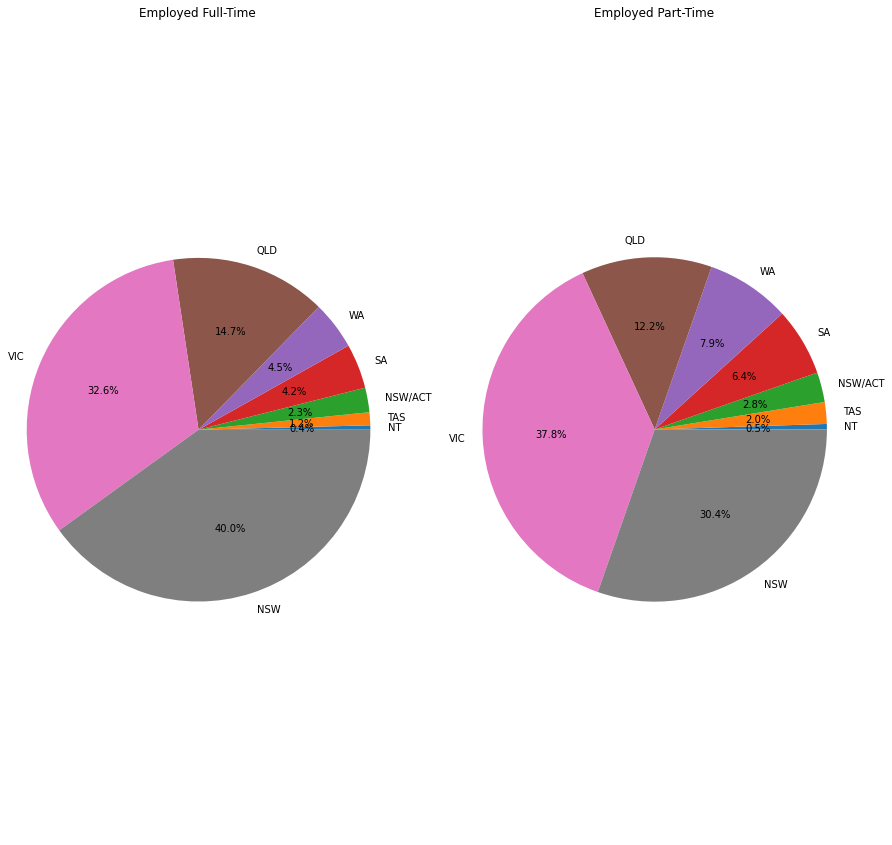

In [78]:
fig1,(ax1,ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.pie(temp_df['Employed Full-Time'], labels = temp_df.index.values, autopct='%1.1f%%',)
ax2.pie(temp_df['Employed Part-Time'], labels = temp_df.index.values, autopct='%1.1f%%',)
ax1.axis('equal')
ax1.title.set_text('Employed Full-Time')
ax2.axis('equal')
ax2.title.set_text('Employed Part-Time')

#ax3


#ax4
plt.show()

In [72]:
temp2_df = test_df[['State/Territory',"Employment by Industry - Total", 'Employed - Male', 'Employed - Female']].groupby("State/Territory").sum()
temp2_df.sort_values(by = "Employed - Female", ascending=True, inplace=True)

temp2_df

,Employment by Industry - Total,Employed - Male,Employed - Female
State/Territory,,,
NT,800,400,300
TAS,2600,1400,1100
NSW/ACT,4500,2300,2200
WA,9900,6500,3500
SA,8800,4900,3800
QLD,26400,16200,10200
VIC,62800,32800,30000
NSW,71000,39100,31900


In [77]:
temp2_df['percent_of_female'] = (temp2_df["Employed - Female"]/temp2_df["Employment by Industry - Total"])*100
temp2_df
# we can understand from the data that ACT and VIC have the most percent of female working in tech, 
# so a female applying for a job at VIC has a higher chance of getting hired(based on total jobs.)

,Employment by Industry - Total,Employed - Male,Employed - Female,percent_of_female
State/Territory,,,,
NT,800,400,300,37.500000
TAS,2600,1400,1100,42.307692
NSW/ACT,4500,2300,2200,48.888889
WA,9900,6500,3500,35.353535
SA,8800,4900,3800,43.181818
QLD,26400,16200,10200,38.636364
VIC,62800,32800,30000,47.770701
NSW,71000,39100,31900,44.929577


In [82]:
# finally we will look at tech industry performance/growth for each state.
temp3_df = test_df[['State/Territory',"Employment by Industry - Total", 'Five year growth by Industry']].groupby("State/Territory").sum()
temp3_df.sort_values(by = "Five year growth by Industry", ascending=False, inplace=True)
temp3_df
# we can see from the data that the tech industry is in declice in most states, except NT, ACT and VIC. 
# this piece of Information helps us identify general growth of the sector and also location 
# where specialists such as AI engineer and medical imageing can be in demand in the future.

,Employment by Industry - Total,Five year growth by Industry
State/Territory,,
VIC,62800,4700
NSW/ACT,4500,600
NT,800,100
TAS,2600,-600
SA,8800,-1800
WA,9900,-5000
NSW,71000,-8100
QLD,26400,-8200


In [83]:
#  I attempten in making an overlap map representation of australia.
'''
x = np.linspace(0, 2 * np.pi, 400)
y = np.linspace(0, 2 * np.pi, 400)

from sklearn import preprocessing
def point_generator(full_time):
  full_time = full_time/10
  x = [random.randint(1, full_time) for n in range(full_time)]
  return preprocessing.normalize(x)

# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(3, 5)
fig, ((ax1, ax2, ax3, ax4, ax5), ( ax6, ax7, ax8, ax9 , ax10) ,( ax11, ax12, ax13, ax14, ax15)) = plt.subplots(3, 5)

fig.suptitle('Sharing x per column, y per row')
ax1.plot(x, y, 'tab:orange')
ax2.plot(x, y, 'tab:gray')
ax3.plot(x, y, 'tab:blue')
ax4.plot(x, y, 'tab:blue')
ax5.plot(x,y, 'tab:blue')

ax6.plot(x, y,'tab:orange')
ax7.plot(x, y, 'tab:gray')
ax8.plot(x, y, 'tab:green')
ax9.plot(x, y, 'tab:pink')
ax10.plot(x, y, 'tab:green')

ax11.plot(x, y, 'tab:orange')
ax12.plot(x, y, 'tab:olive')
ax13.plot(x, y, 'tab:red')
ax14.plot(x, y, 'tab:red')
ax15.plot(x, y, 'tab:brown')




for ax in fig.get_axes():
    ax.label_outer()
'''

"\nx = np.linspace(0, 2 * np.pi, 400)\ny = np.linspace(0, 2 * np.pi, 400)\n\nfrom sklearn import preprocessing\ndef point_generator(full_time):\n  full_time = full_time/10\n  x = [random.randint(1, full_time) for n in range(full_time)]\n  return preprocessing.normalize(x)\n\n# fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9), (ax10, ax11, ax12), (ax13, ax14, ax15)) = plt.subplots(3, 5)\nfig, ((ax1, ax2, ax3, ax4, ax5), ( ax6, ax7, ax8, ax9 , ax10) ,( ax11, ax12, ax13, ax14, ax15)) = plt.subplots(3, 5)\n\nfig.suptitle('Sharing x per column, y per row')\nax1.plot(x, y, 'tab:orange')\nax2.plot(x, y, 'tab:gray')\nax3.plot(x, y, 'tab:blue')\nax4.plot(x, y, 'tab:blue')\nax5.plot(x,y, 'tab:blue')\n\nax6.plot(x, y,'tab:orange')\nax7.plot(x, y, 'tab:gray')\nax8.plot(x, y, 'tab:green')\nax9.plot(x, y, 'tab:pink')\nax10.plot(x, y, 'tab:green')\n\nax11.plot(x, y, 'tab:orange')\nax12.plot(x, y, 'tab:olive')\nax13.plot(x, y, 'tab:red')\nax14.plot(x, y, 'tab:red')\nax15.plot(x, y, 'tab:brown')